#LAB 3. SINGULAR VALUE DECOMPOSITION (SVD)
##**Task 1:** SVD Implementation

In [267]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generating a random 11 x 9 matrix:

In [268]:
rng = default_rng()

A = np.matrix(rng.integers(0, 256, size=(11, 9)))

A

matrix([[235,  38,  24,  60,  51, 227,  71, 246, 135],
        [229,  28, 162,  68, 105, 169, 117, 128, 154],
        [101, 121, 107, 107,  19, 155,  52, 198, 150],
        [  5,  74,  89, 238, 119, 120, 104, 242, 143],
        [202, 213,  54,  42, 175,   4, 175, 102,  41],
        [151,  52, 137,  47, 244, 184,  96, 243, 123],
        [126, 130,  59,  20, 228, 139, 121, 146, 181],
        [239, 146,  79, 146, 108,  38, 184, 118,  60],
        [139,   5, 111, 119, 175, 139, 159, 169, 231],
        [175,  37, 196, 122, 237, 153, 255,  26,  74],
        [254, 169,  57, 131, 114, 214,  92, 166, 163]])

Finding the number of singular values:

In [269]:
sing_values_count = min(A.shape)
sing_values_count

9

In [270]:
left_m = A * A.T
right_m = A.T * A

left_m, right_m

(matrix([[198757, 167150, 146125, 139933, 112265, 180980, 149289, 136695,
          167185, 135864, 199105],
         [167150, 177468, 133845, 131760, 122722, 179419, 151562, 145179,
          175720, 176460, 186290],
         [146125, 133845, 136534, 140083,  95838, 145943, 125136, 115754,
          140504, 113904, 163657],
         [139933, 131760, 140083, 188456, 101626, 165477, 137872, 127462,
          167238, 140050, 162322],
         [112265, 122722,  95838, 101626, 164204, 141015, 141112, 155522,
          125850, 151337, 156406],
         [180980, 179419, 145943, 165477, 141015, 223269, 185374, 148428,
          195069, 186815, 197519],
         [149289, 151562, 125136, 137872, 141112, 185374, 176680, 136933,
          172038, 164212, 180566],
         [136695, 145179, 115754, 127462, 155522, 148428, 136933, 170482,
          147334, 166361, 175749],
         [167185, 175720, 140504, 167238, 125850, 195069, 172038, 147334,
          202977, 185559, 188098],
         [135864, 1

**For matrix $m x n$:**

1. If $m < n$:
- Finding right eigenvalues and eigenvectors
- Finding singular values from right eigenvalues by sorting and trimming them
- Finding right singular vectors by sorting them according to right eigenvalues
- Finding left singular vectors using the formula:

$σ_i * u_i = A * v_i => u_i = (A * v_i) / σ_i$

2. If $m > n$:
- Finding left eigenvalues and eigenvectors
- Finding singular values from left eigenvalues by sorting and trimming them
- Finding left singular vectors by sorting them according to left eigenvalues
- Finding right singular vectors using the formula:

$σ_i * v_i = A^T * u_i => v_i = (A^T * u_i) / σ_i$


In [271]:
if A.shape[0] < A.shape[1]:
  right_eigenvalues, right_eigenvectors = np.linalg.eigh(right_m)

  sorted = np.sort(right_eigenvalues)[::-1]
  singular_values = np.sqrt(sorted[:sing_values_count])

  indices = np.argsort(right_eigenvalues)[::-1]
  right_singular_vectors = right_eigenvectors[:, indices]

  left_singular_vectors = np.zeros((A.shape[0], 1))
  for i in range(sing_values_count):
    left_singular_vectors = np.hstack((left_singular_vectors, np.array(np.dot(A, right_singular_vectors[:, i]) / singular_values[i])))
  left_singular_vectors = left_singular_vectors[:, 1:]

else:
  left_eigenvalues, left_eigenvectors = np.linalg.eigh(left_m)

  sorted = np.sort(left_eigenvalues)[::-1]
  singular_values = np.sqrt(sorted[:sing_values_count])

  indices = np.argsort(left_eigenvalues)[::-1]
  left_singular_vectors = left_eigenvectors[:, indices]

  right_singular_vectors = np.zeros((A.shape[1], 1))
  for i in range(sing_values_count):
    right_singular_vectors = np.hstack((right_singular_vectors, np.array(np.dot(A.T, left_singular_vectors[:, i]) / singular_values[i])))
  right_singular_vectors = right_singular_vectors[:, 1:]

In [272]:
left_singular_vectors.shape

(11, 11)

In [273]:
right_singular_vectors.shape

(9, 9)

Constructing the $Σ$ matrix from singular values:

In [274]:
sigma = np.zeros((A.shape))
for i in range(sing_values_count):
  sigma[i][i] = singular_values[i]
np.asmatrix(sigma)

matrix([[1321.99673246,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,  360.82545775,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,    0.        ,  287.22820562,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,    0.        ,    0.        ,  250.98970951,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
          211.54339355,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,  127.74600219,    0.        ,    0.        ,
            0.        ],
        [   0.        

In [275]:
sigma.shape

(11, 9)

Constructing the $U$ and $V^T$ matrices from left and right singular vectors:

In [276]:
U = left_singular_vectors
Vt = right_singular_vectors.T

In [277]:
U

matrix([[ 0.30114471, -0.38427979, -0.32660333, -0.34194344, -0.08653044,
         -0.34325092,  0.30383939, -0.29165051,  0.47319863, -0.04702715,
          0.09607424],
        [ 0.30380658, -0.01791165,  0.03191505, -0.38942819, -0.29767236,
          0.0741955 , -0.0597834 ,  0.47872864, -0.2679083 , -0.18214068,
          0.56823304],
        [ 0.25219471, -0.33767271, -0.14071904,  0.18921276, -0.12512951,
          0.17571759, -0.46667463,  0.47907514,  0.38437332,  0.15422142,
         -0.31845295],
        [ 0.2770943 , -0.32346364,  0.32258002,  0.70117251, -0.09271141,
         -0.15108597,  0.01249599, -0.1841282 , -0.04681195, -0.17185546,
          0.35451641],
        [ 0.25317544,  0.49636013, -0.36990379,  0.25209786,  0.30221283,
         -0.10647014,  0.05890352,  0.20631157,  0.18369728, -0.55366498,
         -0.0124296 ],
        [ 0.33880429, -0.09521367,  0.22311336, -0.18007287,  0.44395688,
         -0.58445739, -0.18987875,  0.11445418, -0.35585668,  0.1035009

In [278]:
Vt

array([[ 0.4267274 ,  0.22312726,  0.24693575,  0.24855862,  0.3651271 ,
         0.36040509,  0.32420856,  0.40556248,  0.33549598],
       [ 0.24865209,  0.21462473,  0.13122605, -0.09974192,  0.37846696,
        -0.3741825 ,  0.46387666, -0.51715114, -0.31474275],
       [-0.55751162, -0.54594966,  0.37153481,  0.14499538,  0.40659626,
         0.06565878,  0.17365243, -0.10928185,  0.14257876],
       [-0.44568972,  0.45771861, -0.08961139,  0.59224906, -0.02734344,
        -0.39930502,  0.11298659,  0.23985305, -0.05076979],
       [-0.2707707 ,  0.27913207, -0.27031571, -0.55253237,  0.58182815,
        -0.09029932, -0.20510937,  0.26352476,  0.11051153],
       [-0.11038153,  0.27307362, -0.11018996,  0.00773939, -0.11220602,
         0.05290875,  0.00299434, -0.55115815,  0.76280482],
       [ 0.23694395, -0.4811149 , -0.5011014 ,  0.03973802,  0.01964248,
        -0.47924428,  0.29124266,  0.20776318,  0.3188347 ],
       [ 0.04206939,  0.05469769,  0.65384048, -0.33378969, -0

Computing the original $A$ matrix:

In [279]:
U @ sigma @ Vt

matrix([[235.,  38.,  24.,  60.,  51., 227.,  71., 246., 135.],
        [229.,  28., 162.,  68., 105., 169., 117., 128., 154.],
        [101., 121., 107., 107.,  19., 155.,  52., 198., 150.],
        [  5.,  74.,  89., 238., 119., 120., 104., 242., 143.],
        [202., 213.,  54.,  42., 175.,   4., 175., 102.,  41.],
        [151.,  52., 137.,  47., 244., 184.,  96., 243., 123.],
        [126., 130.,  59.,  20., 228., 139., 121., 146., 181.],
        [239., 146.,  79., 146., 108.,  38., 184., 118.,  60.],
        [139.,   5., 111., 119., 175., 139., 159., 169., 231.],
        [175.,  37., 196., 122., 237., 153., 255.,  26.,  74.],
        [254., 169.,  57., 131., 114., 214.,  92., 166., 163.]])

Checking if the computed matrix is similar to the original one:

In [280]:
np.allclose(A, U @ sigma @ Vt)

True

## **Task 2**
### PART 1: Recommendation Algorithm, Data Visualization
Reading the file:

In [281]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)
ratings_matrix = df.pivot(index='userId', columns='movieId',
values='rating')
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Droping rows with more than 200 NAs on the **'user'** axis and more than 100 NAs on the **'ratings'** axis:

In [282]:
ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)
ratings_matrix

movieId,260,296,356,1196,1210,2571
userId,,,,,,
1,5.0,3.0,4.0,5.0,5.0,5.0
4,5.0,1.0,NaN,5.0,NaN,1.0
6,NaN,2.0,5.0,NaN,NaN,NaN
18,4.0,4.0,4.5,4.0,4.5,4.5
19,4.0,NaN,2.0,4.0,3.0,4.0
...,...,...,...,...,...,...
603,4.0,5.0,3.0,3.0,3.0,5.0
605,5.0,2.0,3.0,NaN,5.0,NaN
606,4.5,5.0,4.0,4.5,4.5,5.0


Filling the NAs whis average between 0 and 5: **2.5**:

In [283]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
ratings_matrix_filled

movieId,260,296,356,1196,1210,2571
userId,,,,,,
1,5.0,3.0,4.0,5.0,5.0,5.0
4,5.0,1.0,2.5,5.0,2.5,1.0
6,2.5,2.0,5.0,2.5,2.5,2.5
18,4.0,4.0,4.5,4.0,4.5,4.5
19,4.0,2.5,2.0,4.0,3.0,4.0
...,...,...,...,...,...,...
603,4.0,5.0,3.0,3.0,3.0,5.0
605,5.0,2.0,3.0,2.5,5.0,2.5
606,4.5,5.0,4.0,4.5,4.5,5.0


Converting *pandas* DataFrame into *NumPy* array and subtracting from each row the average user's rating (to eliminate pecularities of each user's rating):

In [284]:
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

Performing SVD preserving 3 dimensions of data.

In $U$ matrix rows correspond to unique users, whereas columns contain unknown information about users' tastes:

In [285]:
U, sigma, Vt = svds(R_demeaned, k=3)
U = pd.DataFrame(U)
V = pd.DataFrame(Vt.T)
U

,0,1,2
0,-0.117015,-0.048678,0.104232
1,0.118472,-0.085750,0.253931
2,0.046599,-0.211470,-0.061674
3,-0.033698,-0.034311,-0.014935
4,-0.113157,0.060237,0.092952
...,...,...,...
129,-0.072841,0.144508,-0.084056
130,-0.007477,-0.073533,0.150896
131,-0.034381,0.071526,-0.013664
132,-0.073523,0.141377,-0.044532


Visualizing similarities between first 15 users' tastes:

In [286]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def plot_data(mat, title, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.title(title)
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in mat.iterrows():
        ax.scatter(row[0], row[1], row[2], alpha=0.6)
        ax.text(row[0], row[1], row[2],'{0}'.format(index), size=10)
    plt.show()

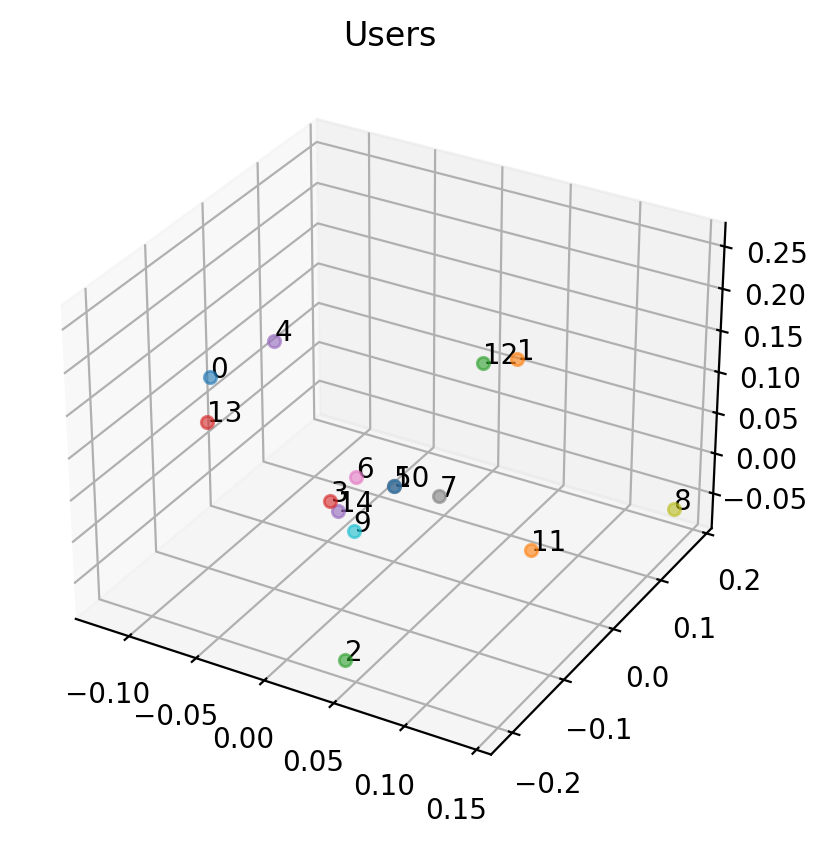

In [287]:
plot_data(U[:15], "Users")

We can see that tastes of users 3, 14 and 5, 6, 7, 10 are similar.


---


In $V$ matrix rows correspond to movies, whereas columns preserve information of some of their unknown features:

In [288]:
V

,0,1,2
0,0.092965,0.035129,0.456855
1,0.436700,0.635248,-0.480204
2,0.269374,-0.760019,-0.423607
3,0.128534,0.049264,0.419957
4,-0.088706,-0.064531,0.333278
5,-0.838867,0.104910,-0.306279


Visualizing similarities between movies:

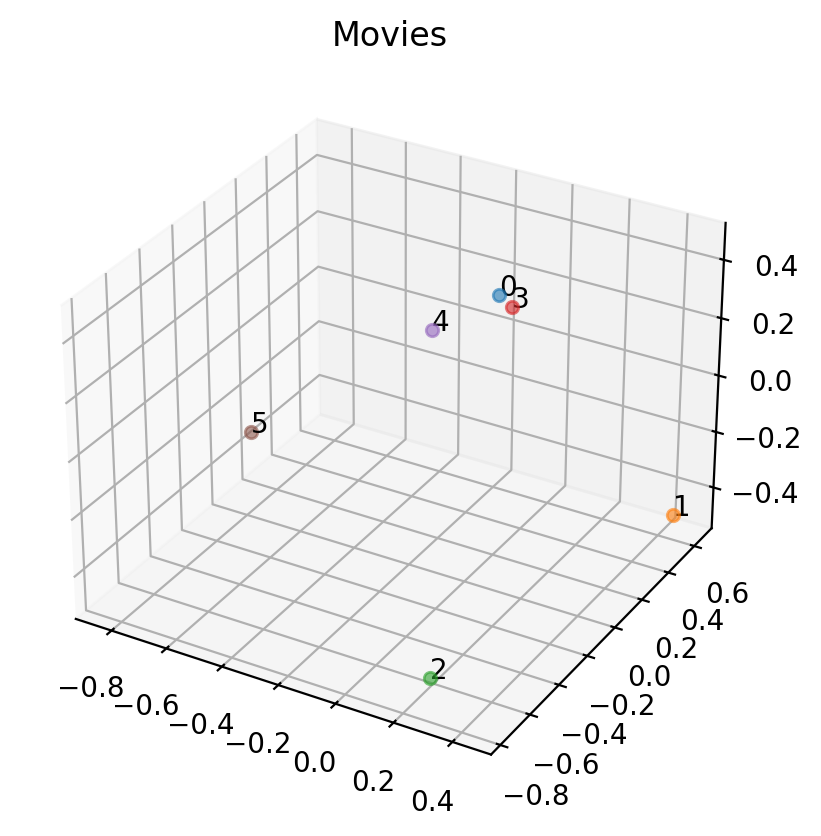

In [289]:
plot_data(V, "Movies")

We can see that movies 0 and 3 are pretty similar.


---


### PART 2: Recommendation Algorithm, Creating a Selection of Recommended Movies for Users

Reading the file:

In [290]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Droping rows with more than 30 NAs on the **'user'** axis and more than 20 NAs on the **'ratings'** axis:

In [291]:
ratings_matrix = ratings_matrix.dropna(thresh=30, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=20, axis=1)
ratings_matrix

movieId,1,2,3,5,6,7,10,11,16,17,...,122920,122922,134130,134853,139385,148626,152081,164179,166528,168252
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling the NAs whis average between 0 and 5: **2.5**.

Converting *pandas* DataFrame into *NumPy* array and subtracting from each row the average user's rating (to eliminate pecularities of each user's rating):

In [292]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

Performing SVD with 3 dimensions:

In [293]:
U, sigma, Vt = svds(R_demeaned, k=3)
U = pd.DataFrame(U)
sigma = np.diag(sigma)
Vt = pd.DataFrame(Vt)

Constructing a matrix with predicted rating by multiplying $U$, $Σ$, $V^T$ from SVD with 3 dimensions (and adding back the extracted average user's rating):

In [294]:
all_user_predicted_ratings = np.dot (np.dot (U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings,
                        columns=ratings_matrix.columns, index=ratings_matrix.index)

preds_df

movieId,1,2,3,5,6,7,10,11,16,17,...,122920,122922,134130,134853,139385,148626,152081,164179,166528,168252
userId,,,,,,,,,,,,,,,,,,,,,
1,3.821263,2.897373,2.792353,2.637703,3.291446,2.703863,3.071415,3.053870,3.031663,3.012145,...,2.502951,2.484686,2.530350,2.508946,2.514680,2.520694,2.462405,2.511114,2.502780,2.485164
3,2.458660,2.483091,2.477454,2.483622,2.469675,2.480997,2.477016,2.468910,2.478965,2.469654,...,2.494643,2.494794,2.499692,2.499305,2.497589,2.494554,2.498943,2.494938,2.497854,2.498645
4,2.802688,2.464337,2.609905,2.518475,2.785843,2.551176,2.556143,2.657534,2.745056,2.786349,...,2.461842,2.444656,2.435963,2.421616,2.465423,2.506749,2.407215,2.481847,2.412433,2.424376
5,2.968903,2.715438,2.618301,2.583496,2.702303,2.603802,2.754823,2.749526,2.557566,2.616919,...,2.471830,2.479535,2.447800,2.457937,2.440300,2.439231,2.460176,2.453761,2.479781,2.455457
6,3.903612,3.392952,3.036667,2.981464,3.050132,3.030441,3.453811,3.464389,2.555697,2.874168,...,2.537111,2.587515,2.389145,2.454892,2.372098,2.370241,2.503723,2.445060,2.566084,2.464101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.322239,2.523971,2.632736,2.483548,3.288598,2.527719,2.696166,2.632435,3.346011,3.035683,...,2.683067,2.619007,2.855585,2.773162,2.838920,2.837129,2.668920,2.767101,2.672612,2.730309
607,3.581568,2.931720,2.751799,2.656357,3.036458,2.704733,3.040573,3.016253,2.754830,2.818058,...,2.467610,2.471996,2.450659,2.456594,2.431867,2.428525,2.442610,2.445802,2.482835,2.443786
608,3.530469,2.892871,2.560258,2.527213,3.170963,2.536372,2.963786,2.616314,3.161390,2.696865,...,2.802618,2.764048,3.079935,3.011473,2.973713,2.867932,2.901646,2.848925,2.920012,2.940435


Constructing a matrix with only predicted values from the original ratings matrix by replacing NAs with predictions and present rating with NAs:

In [295]:
only_predicted = ratings_matrix

na = np.isnan(only_predicted)
only_predicted = pd.DataFrame(np.where(na, preds_df, np.nan))

only_predicted

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,NaN,2.897373,NaN,2.637703,NaN,2.703863,3.071415,3.053870,3.031663,3.012145,...,2.502951,2.484686,2.530350,2.508946,2.514680,2.520694,2.462405,2.511114,2.502780,2.485164
1,2.458660,2.483091,2.477454,2.483622,2.469675,2.480997,2.477016,2.468910,2.478965,2.469654,...,2.494643,2.494794,2.499692,2.499305,2.497589,2.494554,2.498943,2.494938,2.497854,2.498645
2,2.802688,2.464337,2.609905,2.518475,2.785843,2.551176,2.556143,2.657534,2.745056,2.786349,...,2.461842,2.444656,2.435963,2.421616,2.465423,2.506749,2.407215,2.481847,2.412433,2.424376
3,NaN,2.715438,2.618301,2.583496,2.702303,2.603802,2.754823,2.749526,2.557566,2.616919,...,2.471830,2.479535,2.447800,2.457937,2.440300,2.439231,2.460176,2.453761,2.479781,2.455457
4,3.903612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537111,2.587515,2.389145,2.454892,2.372098,2.370241,2.503723,2.445060,2.566084,2.464101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,2.523971,2.632736,2.483548,3.288598,NaN,2.696166,NaN,3.346011,NaN,...,2.683067,2.619007,2.855585,2.773162,2.838920,2.837129,2.668920,2.767101,2.672612,2.730309
497,NaN,2.931720,2.751799,2.656357,3.036458,2.704733,3.040573,NaN,2.754830,2.818058,...,2.467610,2.471996,2.450659,2.456594,2.431867,2.428525,2.442610,2.445802,2.482835,2.443786
498,NaN,NaN,NaN,2.527213,3.170963,2.536372,NaN,2.616314,NaN,2.696865,...,2.802618,2.764048,3.079935,3.011473,2.973713,2.867932,2.901646,2.848925,2.920012,2.940435
499,NaN,2.642115,2.560188,2.543752,2.618031,2.554567,NaN,2.641961,2.528446,2.550237,...,2.484414,2.489502,2.478766,2.484358,2.468847,2.462174,2.483756,2.472728,2.496393,2.480581


Reading the file with info about movies:

In [296]:
file_path = 'movies.csv'
info = pd.read_csv(file_path).set_index('movieId')
info

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


Recommending 10 movies for a certain user by selecting top-10 movies with biggest predicted rating:

In [297]:
def recommend_movie(user, rating_df, info_df):
  recs_index = rating_df.iloc[user].sort_values(ascending=False).index
  existing_recs_index = recs_index.intersection(info_df.index)[:10].tolist()
  recs = info_df.loc[existing_recs_index]
  return recs

In [298]:
recommend_movie(1, only_predicted, info)

,title,genres
movieId,,
1175,Delicatessen (1991),Comedy|Drama|Romance
1124,On Golden Pond (1981),Drama
1131,Jean de Florette (1986),Drama|Mystery
1257,Better Off Dead... (1985),Comedy|Romance
1207,To Kill a Mockingbird (1962),Drama
1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western
1230,Annie Hall (1977),Comedy|Romance
965,"39 Steps, The (1935)",Drama|Mystery|Thriller
1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
